t = 199
Minimum at x = 1.3470206511785285


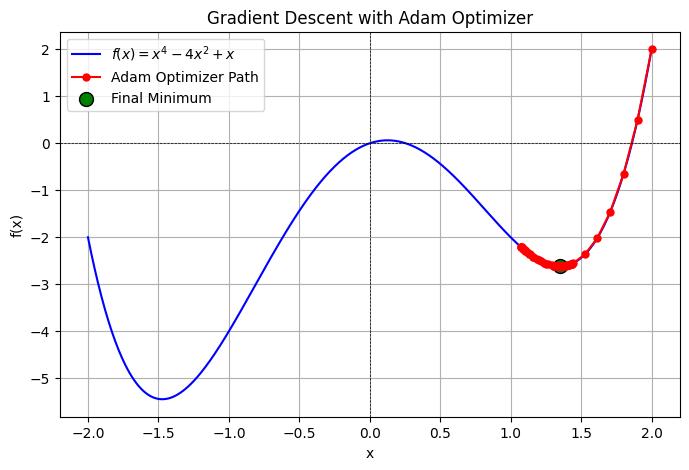

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# تعریف تابع و مشتق آن
def f(x):
    return x**4 - 4*x**2 + x

def df(x):
    # مشتق تابع نسبت به x
    return 4*x**3 - 8*x + 1

# تنظیمات کاهش گرادیان با Adam
alpha = 0.1  # نرخ یادگیری
beta1 = 0.9    # ضریب مومنتوم (برای Adam)
beta2 = 0.999  # ضریب RMSProp (برای Adam)
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر
x = 2       # مقدار اولیه x
tolerance = 1e-6  # آستانه تغییرات برای متوقف کردن الگوریتم
max_iters = 1000  # حداکثر تعداد تکرارها

# ذخیره مقادیر برای رسم مسیر
x_values = [x]

# متغیرهای m و v برای Adam
m = 0  # میانگین گرادیان‌ها (مومنتوم)
v = 0  # میانگین مربعات گرادیان‌ها

# اجرای کاهش گرادیان با Adam
for t in range(1, max_iters ):
    # محاسبه گرادیان نسبت به x
    grad_x = df(x)
    
    # به‌روزرسانی میانگین‌های m و v
    m = beta1 * m + (1 - beta1) * grad_x
    v = beta2 * v + (1 - beta2) * grad_x**2
    
    # اصلاح مقادیر m و v (برای رفع بایاس اولیه)
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    
    # به‌روزرسانی مقدار x با استفاده از Adam
    x_new = x - alpha * m_hat / (np.sqrt(v_hat) + epsilon)
    
    # ذخیره مقادیر جدید
    x_values.append(x_new)
    if abs(x_new - x) < 1e-6:
        break
  
    x = x_new

print(f"t = {t}")
print(f"Minimum at x = {x}")

# رسم تابع
x_range = np.linspace(-2, 2, 500)
y_range = f(x_range)

plt.figure(figsize=(8, 5))
plt.plot(x_range, y_range, label=r'$f(x) = x^4 - 4x^2 + x$', color='b')

# رسم مسیر کاهش گرادیان با Adam
plt.plot(x_values, [f(x) for x in x_values], color='r', marker='o', linestyle='-', markersize=5, label="Adam Optimizer Path")

# نمایش نقطه نهایی
plt.scatter(x_values[-1], f(x_values[-1]), color='g', s=100, label="Final Minimum", edgecolors='black')

# تنظیمات نمودار
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(True)
plt.title("Gradient Descent with Adam Optimizer")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()
